<a href="https://colab.research.google.com/github/milenacm/Airbnb_Florence-Public_WordCloud/blob/main/Word_Cloud_Airbnb_Florenca_Italia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Word Cloud : Florença e Airbnb

**Word cloud**, também é conhecido em português como:
- Nuvem de palavras 
- Nuvem de etiquetas
- Nuvem de tags

É uma forma de expressar a frequência da incidência que determinada palavra ou expressão, utilizada em um contexto.

Uma das utilizações da word cloud é na identificação de oportunidades, dado a fácil visualização das informações com esse tipo de gráfico.

Em UX (User Experience) a word cloud é utilizada dentro da metodologia de UX Writing, com o objetivo de ajudar o usuário a realizar sua tarefa e progredir, com isso obtendo sucesso.

Saber as palavras que são praticadas pelo usuário sendo ela de forma verbal ou escrita e utilizar o mesmo vocabulário, aproxima e facilita o entendimento.
Para se obter resultados com essa técnica se faz necessário planejamento e um processo de trabalho estruturado.

Não irei me estender neste tema, pois os dados que serão analisados tratam-se de pessoas que oferecem seu imóvel e incluem um descritivo do local.

O intuito dessa explicação é apresentar essa técnica e ampliar sua visão de como esse gráfico pode ser analisado.

O artigo a seguir complementa a Análise dos Dados do Airbnb - Florença - Itália, onde detalho o contexto e a motivação que me levaram a escrever este texto.

Para ter acesso a esse estudo completo, clique [aqui](https://medium.com/@cientistadados.milena/an%C3%A1lise-explorat%C3%B3ria-de-dados-airbnb-63cee72375c7).

###Programação
Com a programação em Python em conjunto com a utilização de bibliotecas é possível desenvolver word cloud personalizadas em diversos parâmetros, deixando desse modo mais ajustada à sua necessidade. 

O artigo a seguir complementa a Análise dos Dados do Airbnb em Florença na Itália, onde detalho o contexto e a motivação que me levaram a escrever este texto.
Para ter acesso a esse estudo completo clique [aqui](https://medium.com/@cientistadados.milena/an%C3%A1lise-explorat%C3%B3ria-de-dados-airbnb-63cee72375c7).

###Obtenção dos dados

O Airbnb disponibiliza dados para análise pelo portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html) , utilizaremos essas informações para desenvolver nosso projeto de World Cloud.

Utilizaremos o arquivo `listing.csv.gz` - Detailed Listing data for Florence.

http://data.insideairbnb.com/italy/toscana/florence/2021-12-17/data/listings.csv.gz

Importante: O portal está em constante evolução, e em determinado momento, pode ser que o conjunto de dados exato utilizado nesse notebook não esteja mais disponível, o que quebraria nosso código.

Pensando nisso, disponibilizei [aqui](https://www.dropbox.com/s/829z7d4xm00c2cj/listings.csv.gz?dl=0) o conjunto que utilizei, para que você sempre consiga utilizar esse material.

Observação: Os dados extraídos datam de 17 dezembro de 2021.


###Importando os dados

Este *dataset* é a maior versão disponibilizada. Vamos importar ele por completo, fazer o mesmo tratamento dos dados que foi empregado no case completo e utilizar a variável `description`, que contém o resumo que o anfitrião escreveu sobre seu local.


###Manipulação dos dados
Após a instalação das bibliotecas necessárias e importação dos dados, fiz algumas checagens para verificação das variáveis, com essa análise prévia foi possível constatar:

- variáveis que não utilizei no estudo, foram eliminadas para uma melhor visualização dos dados e performance do processamento.
- variável `preço` com característica object (string), sendo necessária adequação para float64 (numérica).

Para termos a mesma base de comparação do artigo completo que desenvolvi sobre Florença, apliquei as mesmas regras de preço e quantidade mínima de noites.

O campo `description` foi considerado para a extração dos dados e plotagem da word cloud, deste modo eliminei os valores ausentes.

In [ ]:
# instalar wordcloud
!pip install wordcloud -q

In [ ]:
# importar os pacotes necessários
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
DATA_PATH = "http://data.insideairbnb.com/italy/toscana/florence/2021-12-17/data/listings.csv.gz"

# importar o arquivo csv em um df
df = pd.read_csv(DATA_PATH)

In [ ]:
# vamos ver as 5 primeiras entradas
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,24469,https://www.airbnb.com/rooms/24469,20211217003526,2021-12-17,Fortezza/City Centre Modern Apt 2+2,"Apartment, perfect for 2 people, wide, bright ...",In 10/15 minutes walking or with only one stop...,https://a0.muscache.com/pictures/fd822ef3-4f6d...,99178,https://www.airbnb.com/users/show/99178,Benedetta And Lorenzo,2010-03-26,"Florence, Toscana, Italy","Hi, my name is Benedetta and together with my ...",within a few hours,86%,50%,f,https://a0.muscache.com/im/users/99178/profile...,https://a0.muscache.com/im/users/99178/profile...,San Jacopino,5,5,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Florence, Tuscany, Italy",Centro Storico,NaN,43.78210,11.24392,Entire rental unit,Entire home/apt,4,NaN,1 bath,1.0,1.0,"[""Air conditioning"", ""Pack \u2019n play/Travel...",$70.00,2,365,2,2,365,365,2.0,365.0,NaN,t,26,56,86,361,2021-12-17,1,0,0,2019-09-27,2019-09-27,5.00,5.00,5.00,5.00,5.00,4.0,5.00,NaN,f,4,4,0,0,0.04
1,24470,https://www.airbnb.com/rooms/24470,20211217003526,2021-12-17,Fortezza/City Centre Modern Apt 2+1,"Apartment, perfect for 2 people, can accommoda...",In 10/15 minutes walking you will reach the hi...,https://a0.muscache.com/pictures/cfa220db-5c70...,99178,https://www.airbnb.com/users/show/99178,Benedetta And Lorenzo,2010-03-26,"Florence, Toscana, Italy","Hi, my name is Benedetta and together with my ...",within a few hours,86%,50%,f,https://a0.muscache.com/im/users/99178/profile...,https://a0.muscache.com/im/users/99178/profile...,San Jacopino,5,5,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Florence, Tuscany, Italy",Centro Storico,NaN,43.78202,11.24399,Entire rental unit,Entire home/apt,3,NaN,1 bath,1.0,1.0,"[""Fire extinguisher"", ""Dedicated workspace"", ""...",$70.00,2,365,2,2,365,365,2.0,365.0,NaN,t,0,0,0,107,2021-12-17,3,0,0,2010-09-22,2019-04-21,4.67,5.00,5.00,5.00,5.00,4.0,5.00,NaN,f,4,4,0,0,0.02
2,24471,https://www.airbnb.com/rooms/24471,20211217003526,2021-12-17,Fortezza/City Centre Modern Apt 4+2,"Perfect, big apartment for families or groups ...",In 10/15 minutes walking you will reach the hi...,https://a0.muscache.com/pictures/31756e2d-098a...,99178,https://www.airbnb.com/users/show/99178,Benedetta And Lorenzo,2010-03-26,"Florence, Toscana, Italy","Hi, my name is Benedetta and together with my ...",within a few hours,86%,50%,f,https://a0.muscache.com/im/users/99178/profile...,https://a0.muscache.com/im/users/99178/profile...,San Jacopino,5,5,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Florence, Tuscany, Italy",Centro Storico,NaN,43.78202,11.24399,Entire rental unit,Entire home/apt,6,NaN,1.5 baths,2.0,2.0,"[""Air conditioning"", ""Pack \u2019n play/Travel...",$135.00,2,36

In [ ]:
#Exclusão das variáveis que não iremos utilizar nesse estudo.

df_exclusao = df.drop(columns=[ 'listing_url',
                       'scrape_id','last_scraped' ,
                       'name' ,
                      'neighborhood_overview', 
                      'picture_url' ,
                      'host_id',
                      'host_url',
                      'host_name',
                      'host_since',
                      'host_location',
                      'host_about',
                      'host_response_time',
                      'host_response_rate',
                      'host_acceptance_rate',
                      'host_is_superhost',
                      'host_thumbnail_url',
                      'host_picture_url',
                      'host_neighbourhood',
                      'host_listings_count',
                      'host_total_listings_count',
                      'host_verifications',
                      'host_has_profile_pic',
                      'host_identity_verified',
                      'neighbourhood',
                      'neighbourhood_cleansed',
                      'neighbourhood_group_cleansed',
                      'latitude',
                      'longitude',
                      'property_type',
                      'room_type',
                      'accommodates',
                      'bathrooms',
                      'bathrooms_text',
                      'bedrooms',
                      'beds',
                      'amenities',
                      'maximum_nights',
                      'minimum_minimum_nights',
                      'maximum_minimum_nights',
                      'minimum_maximum_nights',
                      'maximum_maximum_nights',
                      'minimum_nights_avg_ntm',
                      'maximum_nights_avg_ntm',
                      'calendar_updated',
                      'has_availability',
                      'availability_30',
                      'availability_60',
                      'availability_90',
                      'availability_365',
                      'calendar_last_scraped',
                      'number_of_reviews',
                      'number_of_reviews_ltm',
                      'number_of_reviews_l30d',
                      'first_review',
                      'last_review',
                      'review_scores_rating',
                      'review_scores_accuracy',
                      'review_scores_cleanliness',
                      'review_scores_checkin',
                      'review_scores_communication',
                      'review_scores_location',
                      'review_scores_value',
                      'license',
                      'instant_bookable',
                      'calculated_host_listings_count',
                      'calculated_host_listings_count_entire_homes',
                      'calculated_host_listings_count_private_rooms',
                      'calculated_host_listings_count_shared_rooms',
                      'reviews_per_month'])

In [ ]:
df_exclusao.head()

,id,description,price,minimum_nights
0,24469,"Apartment, perfect for 2 people, wide, bright ...",$70.00,2
1,24470,"Apartment, perfect for 2 people, can accommoda...",$70.00,2
2,24471,"Perfect, big apartment for families or groups ...",$135.00,2
3,24472,"Santa Maria Novella, perfect apartment for fam...",$120.00,2
4,26738,N4U Guest House is not a Hotel is a Charming B...,$139.00,1


In [ ]:
# Análise do tipo das variáveis no dataset
df_exclusao.dtypes

id                 int64
description       object
price             object
minimum_nights     int64
dtype: object

In [ ]:
#Verificação da variável preço como Object, contendo $  e , que impede que a variável seja convertida em númerica
df_exclusao['price'].sort_values (ascending = False)

1186      $999.00
5097       $99.00
7571       $99.00
6484       $99.00
2321       $99.00
          ...    
2400    $1,000.00
7676    $1,000.00
2399    $1,000.00
987     $1,000.00
8294        $0.00
Name: price, Length: 10268, dtype: object

In [ ]:
#retirei o $ e , (virgula) da variável price
df_exclusao['price'] = df_exclusao['price'].apply(lambda x: str(x).replace('$' , '').replace(',' , ''))

In [ ]:
# Formatação está Ok, porém a variável ainda está como object.
df_exclusao['price'].sort_values (ascending = False)

2758    9999.00
1186     999.00
296       99.00
6056      99.00
6889      99.00
         ...   
7764      10.00
7767      10.00
7835      10.00
8074      10.00
8294       0.00
Name: price, Length: 10268, dtype: object

In [ ]:
# conversão da variável de object (string) para float (númerico)
df_exclusao['price'] = df_exclusao['price'].astype('float64')

In [ ]:
# teste para verificar que a conversão está OK.
df_exclusao['price'].mean()

123.43309310479158

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}" .format(df_exclusao.shape[0]))
print("Variáveis:\t {}\n" .format(df_exclusao.shape[1]))

#verificar as características dos campos
display(df_exclusao.dtypes)

Entradas:	 10268
Variáveis:	 4



id                  int64
description        object
price             float64
minimum_nights      int64
dtype: object

In [ ]:
#CONSIDERANDO OS MESMOS PARAMETROS EMPREGADOS NO CASE COMPLETO
#remover outliers em um novo DataFrame
df_clean = df_exclusao.copy()
df_clean.drop(df_clean[df_clean.price > 500].index, axis = 0 , inplace = True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis = 0 , inplace = True)

Para fazer a World Cloud eliminei possíveis valores ausentes na variável `description`

In [ ]:
# Quantidade de valores ausentes
print("Valores ausentes para description: ", df_clean.description.isnull().sum())

# Exclusão das colunas com valores ausentes
description = df.dropna(subset=['description'], axis=0)['description']

Valores ausentes para description:  160


In [ ]:
# Exemplo de descrições para os imóveis
display(description.iloc[100])

"<b>The space</b><br />Delizioso bilocale 40 mq, nei pressi di Piazza Dalmazia. Ottimamente servito da mezzi pubblici sia per il centro storico che per l'ospedale di Careggi e del pediatrico Meyer.<br />L'appartamento si trova in un piccolo condominio al 4° piano, no ascensore. Camera matrimoniale, sala con angolo cottura (con forno e lavastoviglie), piccolo bagno, aria condizionata, riscaldamento autonomo, zanzariere, balcone con lavatrice. <br />Stoviglie, lenzuola e asciugamani forniti.<br />Soggiorno minimo 7 notti<br />Il quartiere e' vivo e fornitissimo, due grandi supermercati, ristoranti e negozi di ogni genere.<br />Sotto casa la fermata dell'autobus che porta in centro in 5 minuti.<br /><br /><b>Other things to note</b><br />no lift"

Concatenei todas as strings, como se fosse uma única linha, para desenvolver a **Worldcloud**

In [ ]:
# Concatenar
all_description = " ".join(s for s in description)

print("Quantidade de Palavras: {}".format(len(all_description)))

Quantidade de Palavras: 7936249


### Word Cloud Code
Neste ponto dei início utilização da biblioteca **Word cloud**.

O primeiro passo é a criação de uma lista stopwords, que são palavras que não desejo que sejam exibidas em minha word cloud.

Em seguida formei a word cloud conforme comando da programação.


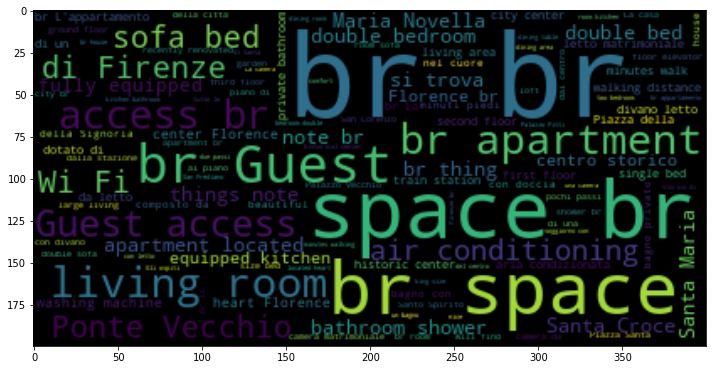

In [ ]:
# lista de stopword
stopwords = set(STOPWORDS)

# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black").generate(all_description)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')

plt.tight_layout()

Observe o destaque das palavras *br, thing, things, note, access, si trova, guest, La, di, un* , que não acrescentam informação relevante. 

Para melhora a visualização, irei atualizar a lista stopwords.

Aproveitando esse passo e a busca de personalização ao projeto para o tema Itália, fiz modificação no plano de fundo e fonte da *word cloud*.


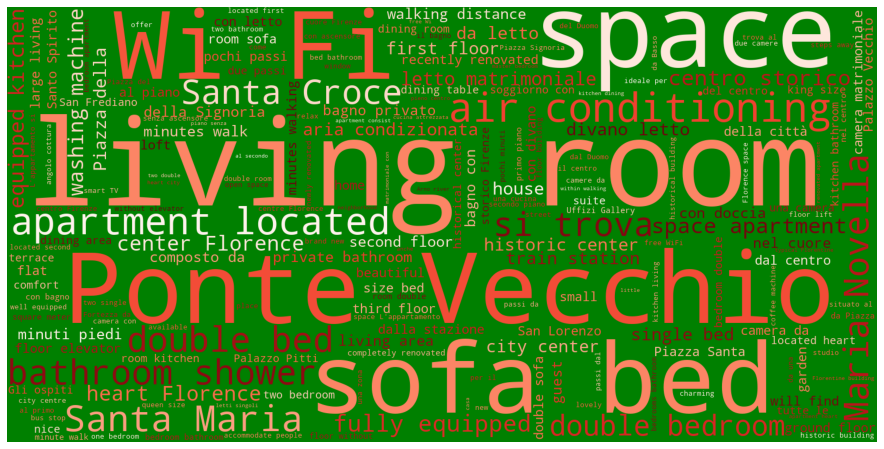

In [ ]:
# Atualização da lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["br", "thing", "things", "note", "access", "si trova", "guest", "La", "di", "un"])

#gerar Word cloud
#Para combinar com as cores da bandeira italiana, alterei as fores do fundo e fontes, conforme abaixo.
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="green", #Alterei cor de fundo
                      width=1600, height=800 , colormap = "Reds").generate(all_description) #Alterei a cor da fonte https://matplotlib.org/stable/tutorials/colors/colormaps.html

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(16,8))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file("airbnb_description_wordcloud.png",)

Em uma **breve análise do resultado** que a word cloud apresentou é possível observar:

Grande destaque para 6 palavras, sendo uma delas Ponte Vecchio, que é uma ponte sobre um rio em que ambos os lados possuem diversas joalherias e as demais palavras características do imóvel para locação.

Presença de muitas palavras em Italiano, apesar do Airbnb ser um site que atende viajantes do mundo todo.

A maior parte das palavras é para descrever o imóvel, contudo também há presença significativa de pontos turísticos.

##Word Cloud sobre uma imagem

Podemos deixar ilustrativo e mais atraente nossa word cloud, criando um efeito visual.

É possível utilizar imagens como máscaras nas word clounds.

Aplicarei uma *landscape* da cidade de Florença, conforme a imagem abaixo:



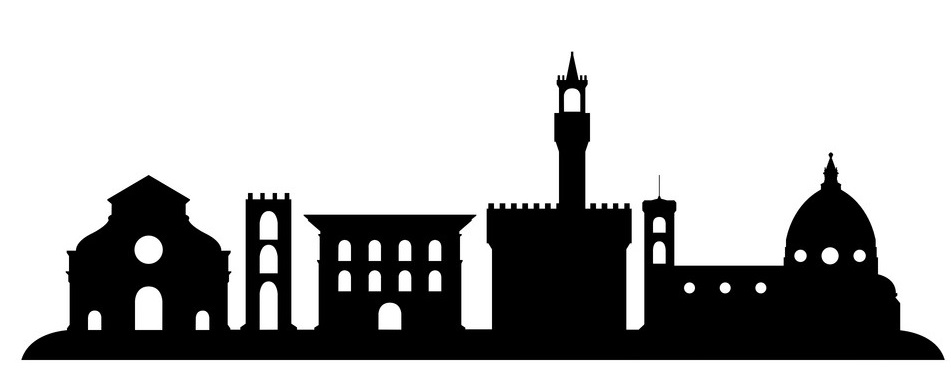


Para plotar a imagem, escolho o [colormap](https://matplotlib.org/stable/tutorials/colors/colormaps.html) com as cores que mais se assemelha com as cores da bandeira da Itália, entre o vermelho e o verde.

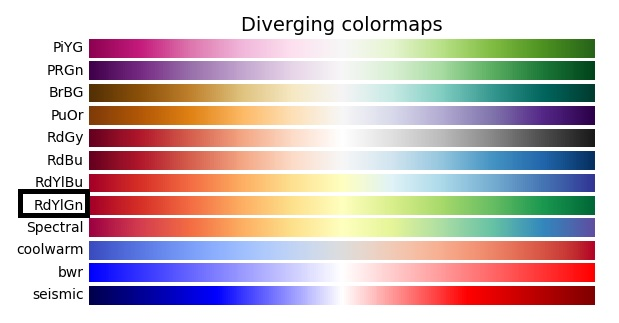

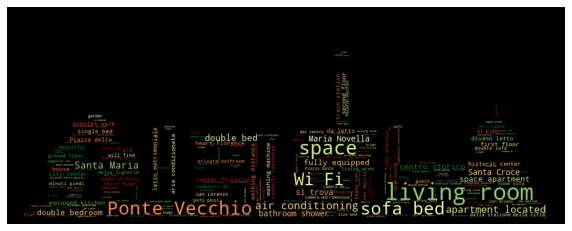

In [ ]:
# endereço LOCAL da SUA imagem
florence_mask = np.array(Image.open("/content/florence.jpg"))

# gerar  word cloud
wordcloud = WordCloud(stopwords=stopwords, 
                          background_color="black", 
                          width = 1000, 
                          height = 1000,
                          colormap = "RdYlGn",
                          max_words=1000, 
                          mask=florence_mask, 
                          max_font_size= 200,
                          min_font_size=1).generate(all_description)

# mostrar a imagem final
fig, ax = plt.subplots (figsize = (10,20))
ax.imshow(wordcloud , interpolation="bilinear")
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file("airbnb_florence.png")